#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Создайте сравнительную таблицу в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

##Импорт библиотек

In [2]:
# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
from google.colab import files

# Для загрузки датасета
from keras.datasets import fashion_mnist

# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

##Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

###Вывод примеров

In [3]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


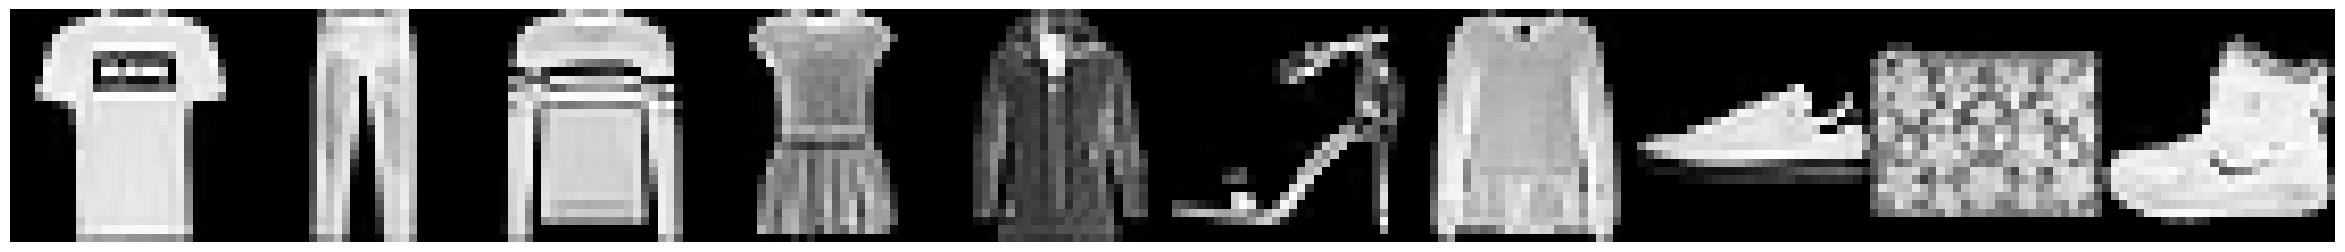

In [4]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

In [21]:
# создание словаря для запоминания результатов
accuracyDict = dict()

In [6]:
# преобразование картинок в список
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train.shape}')
print(f'Форма  тестовых данных: {x_test.shape}')

Форма обучающих данных: (60000, 784)
Форма  тестовых данных: (10000, 784)


In [7]:
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [8]:
CLASS_COUNT = 10
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

In [9]:
print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=10,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/10
7500/7500 [==============================] - 27s 3ms/step - loss: 0.0870 - accuracy: 0.8231 - val_loss: 0.0671 - val_accuracy: 0.8653
Epoch 2/10
7500/7500 [==============================] - 27s 4ms/step - loss: 0.0661 - accuracy: 0.8653 - val_loss: 0.0609 - val_accuracy: 0.8767
Epoch 3/10
7500/7500 [==============================] - 27s 4ms/step - loss: 0.0602 - accuracy: 0.8767 - val_loss: 0.0585 - val_accuracy: 0.8792
Epoch 4/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.0568 - accuracy: 0.8841 - val_loss: 0.0558 - val_accuracy: 0.8873
Epoch 5/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.0540 - accuracy: 0.8893 - val_loss: 0.0496 - val_accuracy: 0.8977
Epoch 6/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.0516 - accuracy: 0.8938 - val_loss: 0.0507 - val_accuracy: 0.8967
Epoch 7/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0499 - accuracy: 0.8978 - val_loss: 0.0464 - val_ac

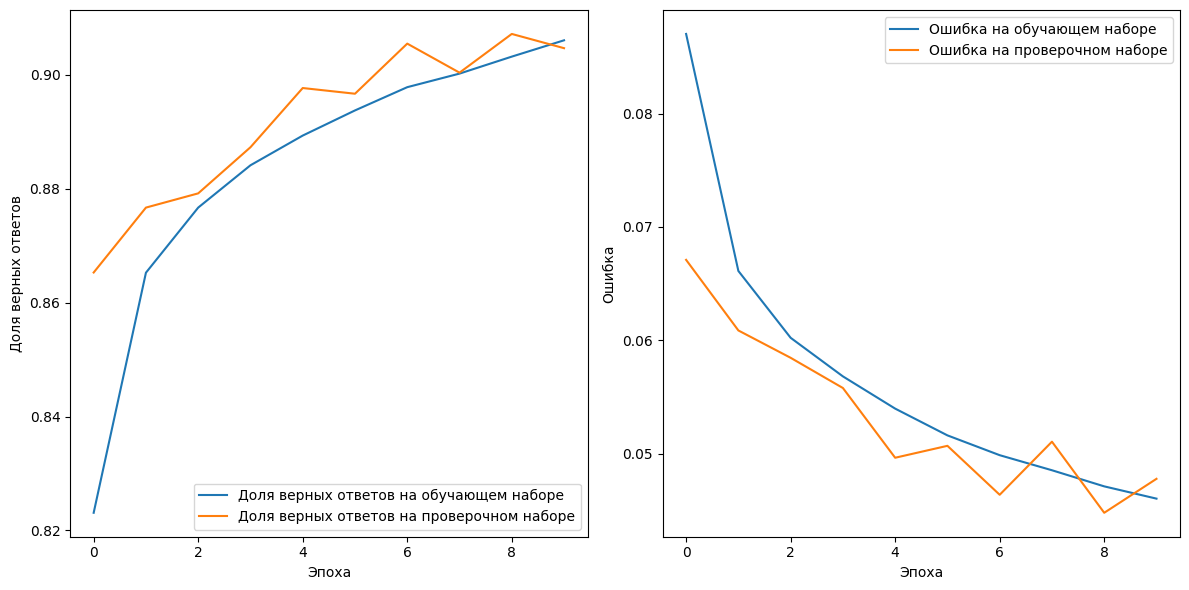

In [15]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0652 - accuracy: 0.8770
Model 1 - Test Accuracy: 0.8769999742507935


In [22]:
accuracyDict['relu_3_epoch_10'] = accuracy

In [23]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(75))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=10,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0880 - accuracy: 0.8167 - val_loss: 0.0657 - val_accuracy: 0.8646
Epoch 2/10
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0655 - accuracy: 0.8670 - val_loss: 0.0581 - val_accuracy: 0.8825
Epoch 3/10
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0598 - accuracy: 0.8787 - val_loss: 0.0651 - val_accuracy: 0.8742
Epoch 4/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0565 - accuracy: 0.8853 - val_loss: 0.0561 - val_accuracy: 0.8848
Epoch 5/10
7500/7500 [==============================] - 26s 4ms/step - loss: 0.0531 - accuracy: 0.8912 - val_loss: 0.0529 - val_accuracy: 0.8966
Epoch 6/10
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0510 - accuracy: 0.8958 - val_loss: 0.0484 - val_accuracy: 0.9024
Epoch 7/10
7500/7500 [==============================] - 27s 4ms/step - loss: 0.0494 - accuracy: 0.8991 - val_loss: 0.0502 - val_ac

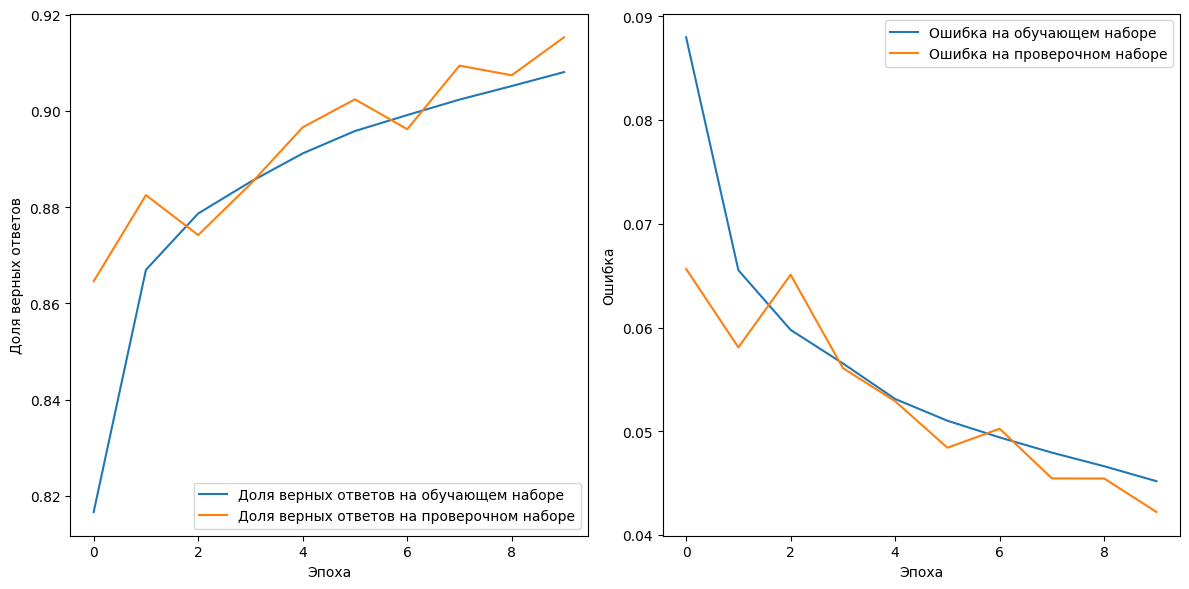

In [24]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [25]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0613 - accuracy: 0.8839
Model 1 - Test Accuracy: 0.883899986743927


In [26]:
accuracyDict['relu_4_epoch_10'] = accuracy

In [27]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(200, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=15,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/15
7500/7500 [==============================] - 35s 4ms/step - loss: 0.0888 - accuracy: 0.8180 - val_loss: 0.0657 - val_accuracy: 0.8660
Epoch 2/15
7500/7500 [==============================] - 27s 4ms/step - loss: 0.0666 - accuracy: 0.8641 - val_loss: 0.0613 - val_accuracy: 0.8820
Epoch 3/15
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0604 - accuracy: 0.8753 - val_loss: 0.0567 - val_accuracy: 0.8860
Epoch 4/15
7500/7500 [==============================] - 29s 4ms/step - loss: 0.0570 - accuracy: 0.8835 - val_loss: 0.0548 - val_accuracy: 0.8904
Epoch 5/15
7500/7500 [==============================] - 27s 4ms/step - loss: 0.0541 - accuracy: 0.8890 - val_loss: 0.0533 - val_accuracy: 0.8942
Epoch 6/15
7500/7500 [==============================] - 27s 4ms/step - loss: 0.0519 - accuracy: 0.8934 - val_loss: 0.0502 - val_accuracy: 0.8977
Epoch 7/15
7500/7500 [==============================] - 30s 4ms/step - loss: 0.0505 - accuracy: 0.8960 - val_loss: 0.0498 - val_ac

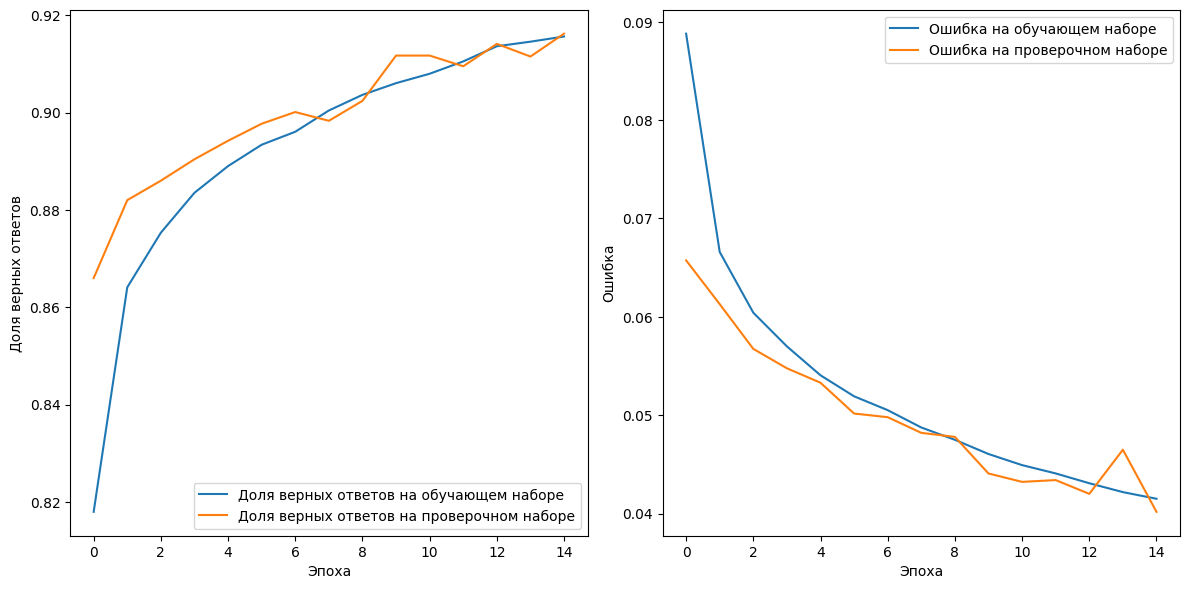

In [28]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [29]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.8789
Model 1 - Test Accuracy: 0.8788999915122986


In [30]:
accuracyDict['relu_5_epoch_15'] = accuracy

In [31]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(75))
model.add(Activation('linear'))
model.add(Dense(30))
model.add(Activation('linear'))
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=10,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/10
7500/7500 [==============================] - 27s 3ms/step - loss: 0.0872 - accuracy: 0.8257 - val_loss: 0.0761 - val_accuracy: 0.8421
Epoch 2/10
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0692 - accuracy: 0.8632 - val_loss: 0.0730 - val_accuracy: 0.8507
Epoch 3/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0636 - accuracy: 0.8747 - val_loss: 0.0598 - val_accuracy: 0.8814
Epoch 4/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0600 - accuracy: 0.8829 - val_loss: 0.0556 - val_accuracy: 0.8911
Epoch 5/10
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0572 - accuracy: 0.8881 - val_loss: 0.0540 - val_accuracy: 0.8973
Epoch 6/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0553 - accuracy: 0.8905 - val_loss: 0.0509 - val_accuracy: 0.9011
Epoch 7/10
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0536 - accuracy: 0.8939 - val_loss: 0.0521 - val_ac

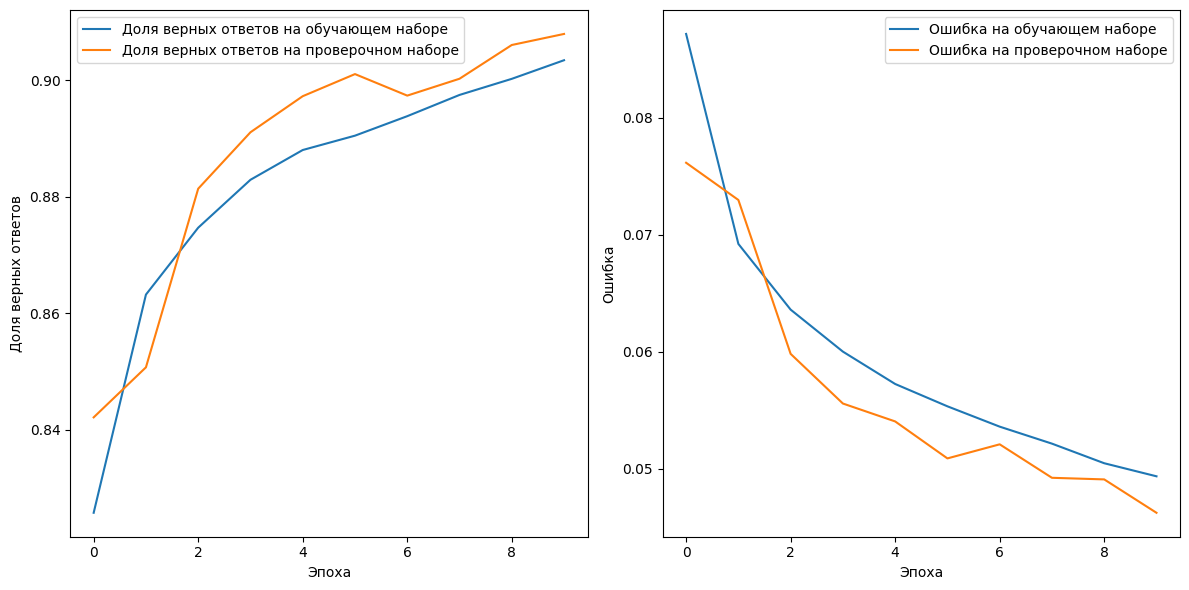

In [32]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [33]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0631 - accuracy: 0.8797
Model 1 - Test Accuracy: 0.8797000050544739


In [34]:
accuracyDict['linear_4_epoch_10'] = accuracy

In [35]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(75))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 5ms/step - loss: 0.2022 - accuracy: 0.6238 - val_loss: 0.0870 - val_accuracy: 0.8278
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0991 - accuracy: 0.8220 - val_loss: 0.0727 - val_accuracy: 0.8531
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0844 - accuracy: 0.8485 - val_loss: 0.0641 - val_accuracy: 0.8676
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0760 - accuracy: 0.8619 - val_loss: 0.0599 - val_accuracy: 0.8792
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0706 - accuracy: 0.8706 - val_loss: 0.0565 - val_accuracy: 0.8854
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0664 - accuracy: 0.8778 - val_loss: 0.0551 - val_accuracy: 0.8899
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0646 - accuracy: 0.8805 - val_loss: 0.0518 - val_accuracy: 0.8950
Epoch 

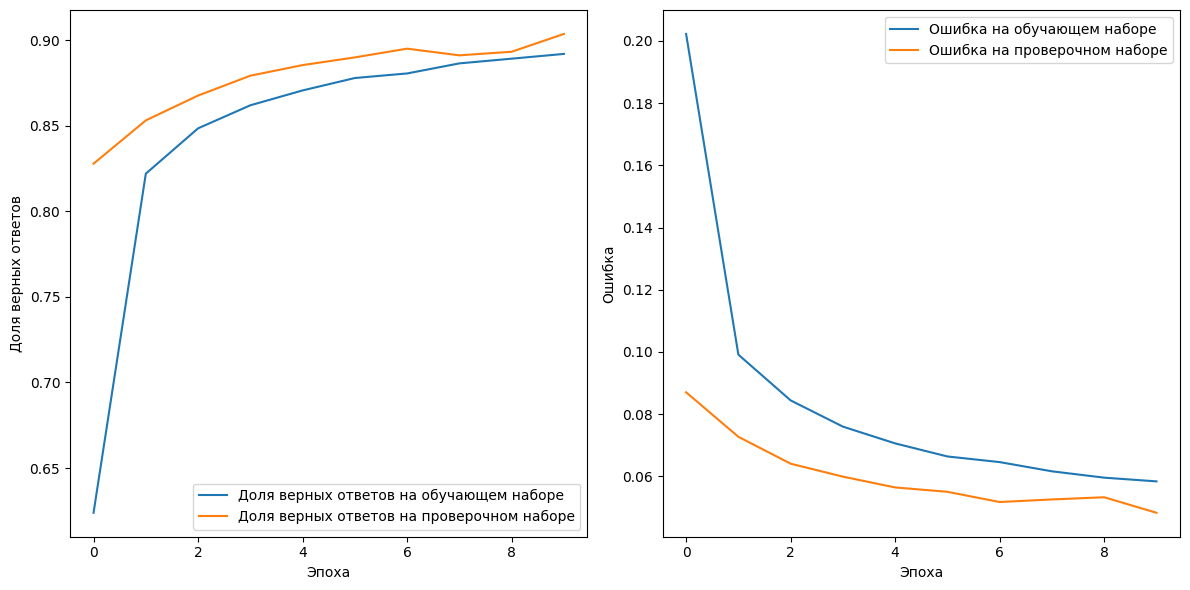

In [36]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [37]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.8782
Model 1 - Test Accuracy: 0.8781999945640564


In [38]:
accuracyDict['relu_4_epoch_10_drop'] = accuracy

In [39]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(75))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=10,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/10
7500/7500 [==============================] - 40s 5ms/step - loss: 0.1317 - accuracy: 0.7695 - val_loss: 0.0831 - val_accuracy: 0.8317
Epoch 2/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.0937 - accuracy: 0.8188 - val_loss: 0.0781 - val_accuracy: 0.8515
Epoch 3/10
7500/7500 [==============================] - 36s 5ms/step - loss: 0.0878 - accuracy: 0.8323 - val_loss: 0.0791 - val_accuracy: 0.8457
Epoch 4/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.0837 - accuracy: 0.8399 - val_loss: 0.0658 - val_accuracy: 0.8731
Epoch 5/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.0812 - accuracy: 0.8442 - val_loss: 0.0763 - val_accuracy: 0.8557
Epoch 6/10
7500/7500 [==============================] - 36s 5ms/step - loss: 0.0779 - accuracy: 0.8498 - val_loss: 0.0668 - val_accuracy: 0.8697
Epoch 7/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.0765 - accuracy: 0.8543 - val_loss: 0.0663 - val_ac

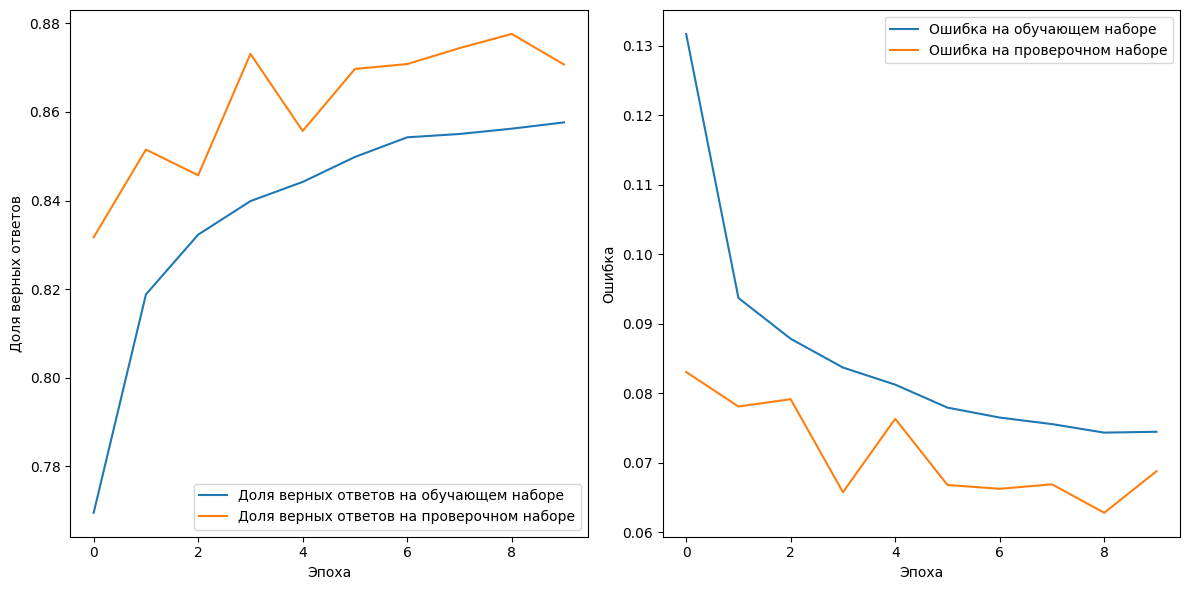

In [40]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [41]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.8524
Model 1 - Test Accuracy: 0.852400004863739


In [43]:
accuracyDict['relu_4_epoch_10_norm'] = accuracy

In [42]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(75))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=10,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/10
7500/7500 [==============================] - 41s 5ms/step - loss: 0.1865 - accuracy: 0.6631 - val_loss: 0.0897 - val_accuracy: 0.8144
Epoch 2/10
7500/7500 [==============================] - 40s 5ms/step - loss: 0.1376 - accuracy: 0.7412 - val_loss: 0.0805 - val_accuracy: 0.8353
Epoch 3/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.1289 - accuracy: 0.7633 - val_loss: 0.0797 - val_accuracy: 0.8437
Epoch 4/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.1249 - accuracy: 0.7690 - val_loss: 0.0793 - val_accuracy: 0.8389
Epoch 5/10
7500/7500 [==============================] - 40s 5ms/step - loss: 0.1238 - accuracy: 0.7716 - val_loss: 0.0756 - val_accuracy: 0.8473
Epoch 6/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.1204 - accuracy: 0.7805 - val_loss: 0.0743 - val_accuracy: 0.8516
Epoch 7/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.1189 - accuracy: 0.7844 - val_loss: 0.0723 - val_ac

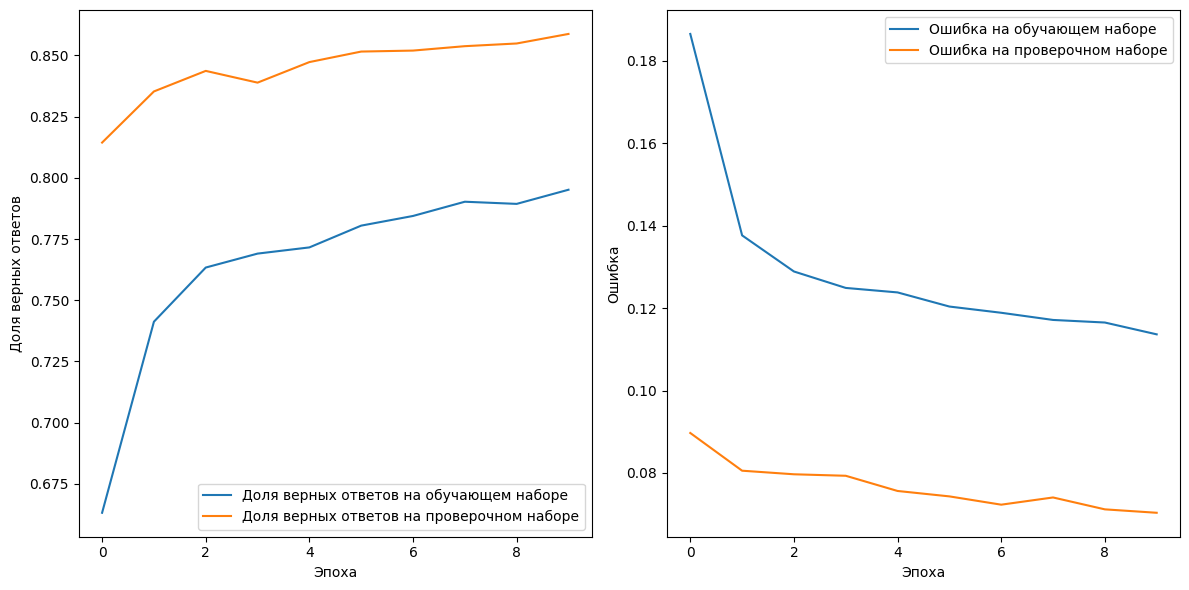

In [44]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [45]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0767 - accuracy: 0.8438
Model 1 - Test Accuracy: 0.8438000082969666


In [46]:
accuracyDict['relu_4_epoch_10_bath_norm'] = accuracy

In [63]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(75))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=10,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/10
7500/7500 [==============================] - 31s 4ms/step - loss: 0.1018 - accuracy: 0.7965 - val_loss: 0.0701 - val_accuracy: 0.8550
Epoch 2/10
7500/7500 [==============================] - 27s 4ms/step - loss: 0.0738 - accuracy: 0.8511 - val_loss: 0.0617 - val_accuracy: 0.8719
Epoch 3/10
7500/7500 [==============================] - 29s 4ms/step - loss: 0.0679 - accuracy: 0.8630 - val_loss: 0.0587 - val_accuracy: 0.8804
Epoch 4/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0642 - accuracy: 0.8708 - val_loss: 0.0553 - val_accuracy: 0.8867
Epoch 5/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0619 - accuracy: 0.8762 - val_loss: 0.0550 - val_accuracy: 0.8854
Epoch 6/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.0598 - accuracy: 0.8801 - val_loss: 0.0541 - val_accuracy: 0.8855
Epoch 7/10
7500/7500 [==============================] - 29s 4ms/step - loss: 0.0583 - accuracy: 0.8830 - val_loss: 0.0532 - val_ac

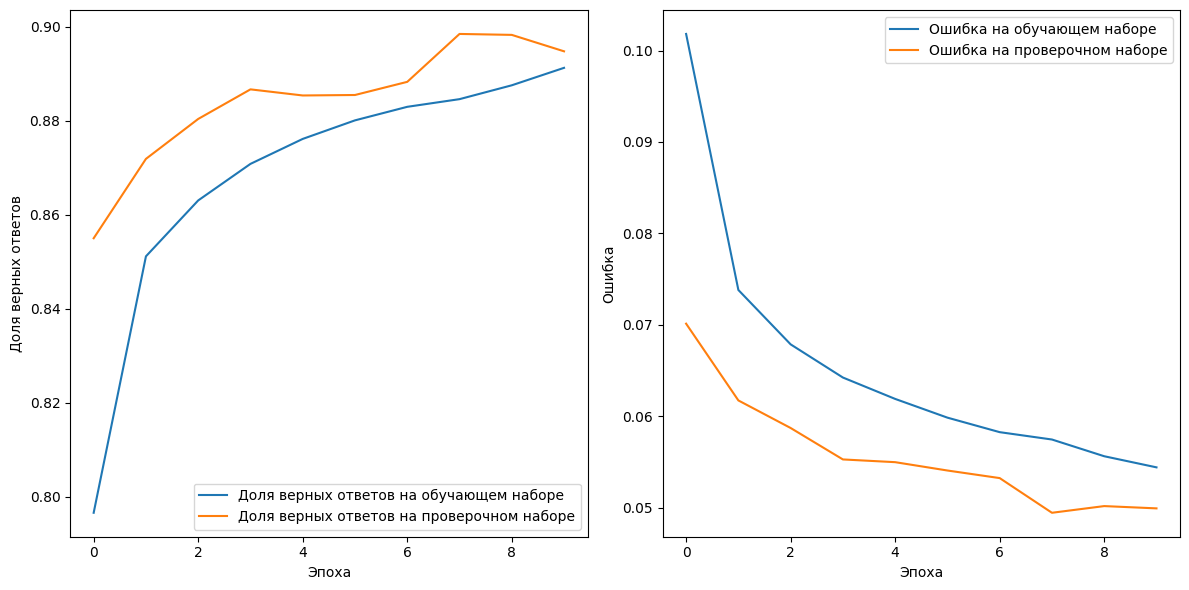

In [64]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [65]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0631 - accuracy: 0.8740
Model 1 - Test Accuracy: 0.8740000128746033


In [66]:
accuracyDict['relu_4_epoch_10_drop10'] = accuracy

In [67]:
# Создание модели
model = Sequential()

# Добавление слоев
model.add(Dense(150, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(75))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(x_train,
          y_train,
          batch_size=8,
          epochs=10,
          validation_data=(x_train[50000:], y_train[50000:]),
          verbose=1)

Epoch 1/10
7500/7500 [==============================] - 32s 4ms/step - loss: 0.1877 - accuracy: 0.5884 - val_loss: 0.1038 - val_accuracy: 0.7756
Epoch 2/10
7500/7500 [==============================] - 29s 4ms/step - loss: 0.1336 - accuracy: 0.6986 - val_loss: 0.1029 - val_accuracy: 0.7744
Epoch 3/10
7500/7500 [==============================] - 31s 4ms/step - loss: 0.1269 - accuracy: 0.7223 - val_loss: 0.0929 - val_accuracy: 0.7776
Epoch 4/10
7500/7500 [==============================] - 29s 4ms/step - loss: 0.1233 - accuracy: 0.7296 - val_loss: 0.0922 - val_accuracy: 0.7859
Epoch 5/10
7500/7500 [==============================] - 30s 4ms/step - loss: 0.1210 - accuracy: 0.7377 - val_loss: 0.0881 - val_accuracy: 0.8043
Epoch 6/10
7500/7500 [==============================] - 30s 4ms/step - loss: 0.1199 - accuracy: 0.7448 - val_loss: 0.0869 - val_accuracy: 0.8174
Epoch 7/10
7500/7500 [==============================] - 29s 4ms/step - loss: 0.1184 - accuracy: 0.7467 - val_loss: 0.0878 - val_ac

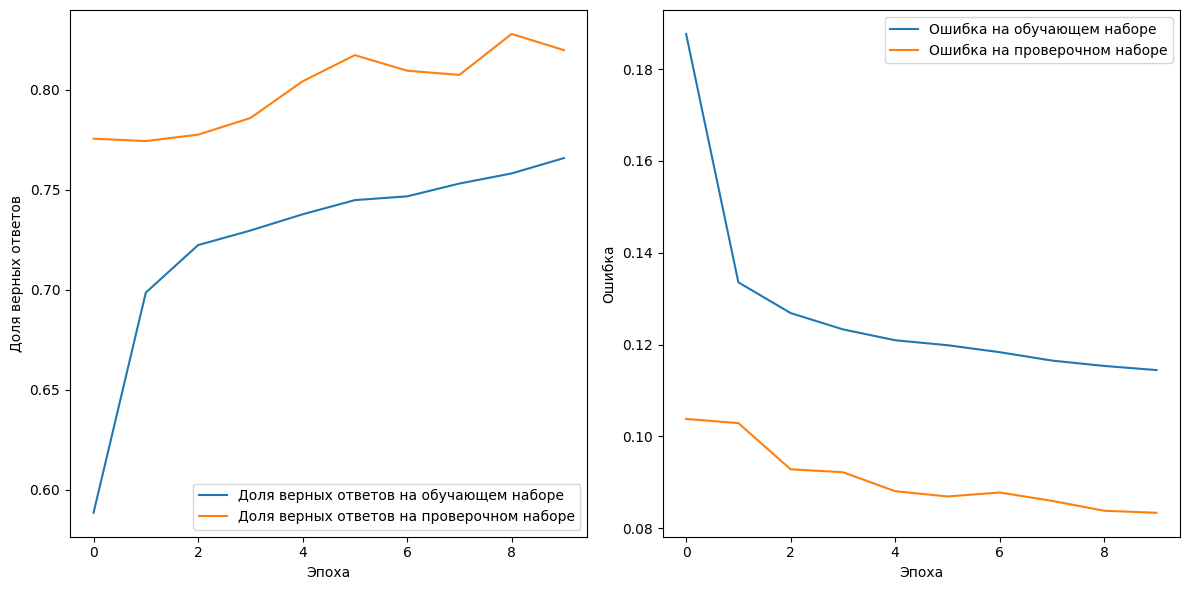

In [68]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
axes[0].plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Доля верных ответов')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Ошибка на обучающем наборе')
axes[1].plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Ошибка')
axes[1].legend()

plt.tight_layout()
plt.show()

In [69]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Model 1 - Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.8089
Model 1 - Test Accuracy: 0.808899998664856


In [70]:
accuracyDict['relu_4_epoch_10_drop50'] = accuracy

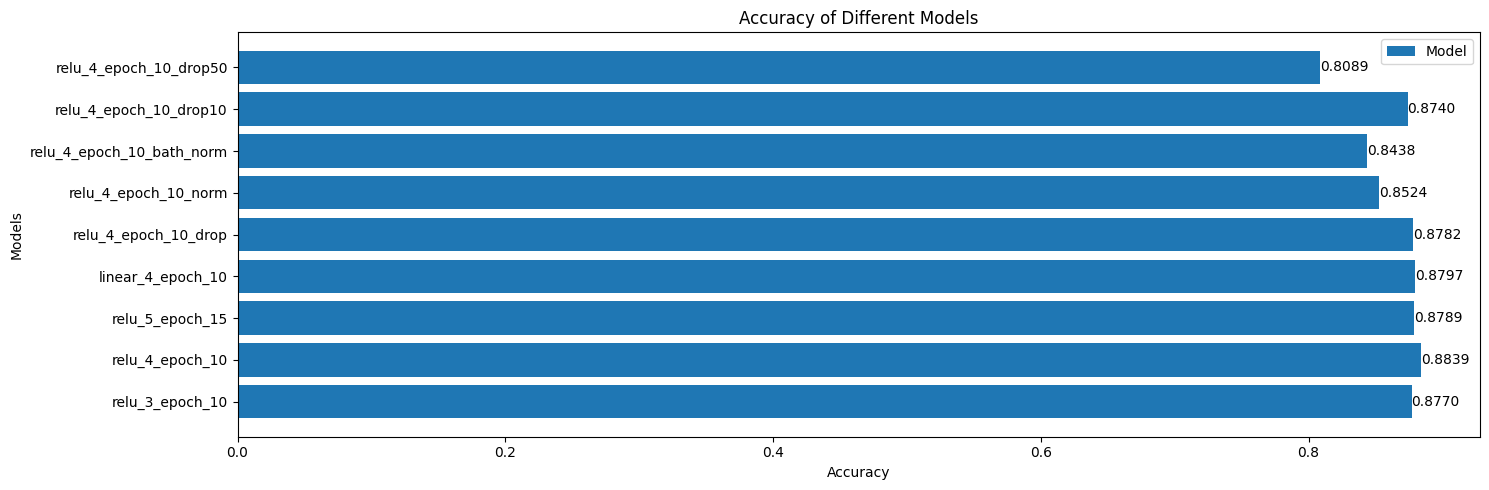

In [71]:
# Предположим, что accuracyDict содержит ваш словарь с данными

labels = list(accuracyDict.keys())
values = list(accuracyDict.values())

# Создание графика
plt.figure(figsize=(15, 5))

# Построение столбцовдля accuracy_lin
bars = plt.barh(labels, values, label='Model')


# Добавление подписей осей и заголовка
plt.xlabel('Accuracy')  # изменена подпись оси x
plt.ylabel('Models')  # изменена подпись оси y
plt.title('Accuracy of Different Models')

# Добавление горизонтальных линий для обозначения уровней
#for level in values:
#    plt.axvline(x=level, color='gray', linestyle='--', linewidth=0.5)

# Добавление легенды
plt.legend()

# Добавление засечек для каждого столбца
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', va='center')

# Отображение графика
plt.tight_layout()
plt.show()

# **Выводы**
Самую высокую обучаемось показала модель из 4 слоев с функцией активации ReLu, десятью эпохами обучения и отсутствием слоев Dropout и BatchNormalization.
Новый раздел